# Demo Notebook on Impermanent Loss (IL) risk

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)

# See how these notebooks are created in fetch_dataframes.py
token_df = pd.read_csv('data/token_df.csv').reset_index(drop=True)
timestamp_df = pd.read_csv('data/timestamp_df.csv')
eth_price_df = pd.read_csv('data/eth_price_df.csv')
il_df = pd.read_csv('data/il_df.csv')
il_df['date']= pd.to_datetime(il_df['timestamp'],unit='s' )
historical_df = pd.read_csv('data/historical_df.csv').drop(columns=['index'])
price_df = pd.read_csv('data/price_df.csv')
flat_price_df = pd.read_csv('data/flat_price_df.csv')


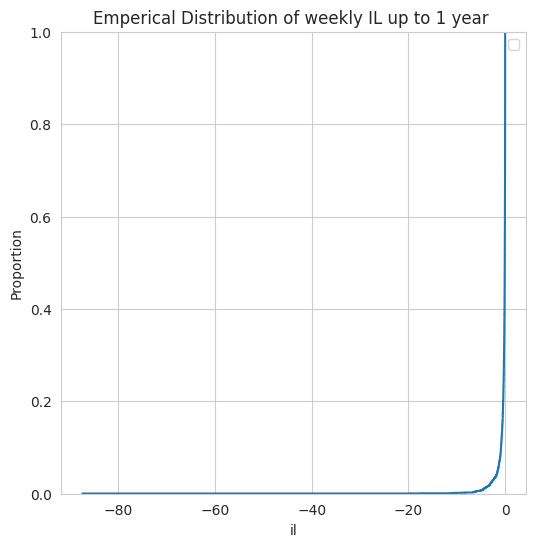

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.ecdfplot(data=il_df, x='il')
plt.legend([])
plt.title("Emperical Distribution of weekly IL up to 1 year ")
plt.show()

IL Risk is very right tailed. It is almost always <1% but is ocassionally very large. I think the right approach for managing IL risk is to prioitize avoiding the disasters

In [3]:
for il_amount in [-5, -1, -.5, -.1, -.01]:
    print(f'{100 * round((il_df["il"] > il_amount).sum() / len(il_df), 4)}% of weeks have less than {il_amount}% IL')

99.29% of weeks have less than -5% IL
91.91% of weeks have less than -1% IL
83.23% of weeks have less than -0.5% IL
53.959999999999994% of weeks have less than -0.1% IL
19.86% of weeks have less than -0.01% IL


In [4]:
historical_df['tvl'] = (historical_df['token0_reserves'] * historical_df['token0_price']) \
                        + (historical_df['token1_reserves'] * historical_df['token1_price']) 
historical_df

,pool_address,block_number,token0_reserves,token1_reserves,token0_price,token1_price,timestamp,token0_address,token1_address,tvl
0,0x470e8de2eBaef52014A47Cb5E6aF86884947F08c,15871479,1.712422e+03,6.694766e+07,1566.867312,0.040078,1667260800,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xc770EEfAd204B5180dF6a14Ee197D99d808ee52d,5.366275e+06
1,0x470e8de2eBaef52014A47Cb5E6aF86884947F08c,15864318,1.724328e+03,6.652565e+07,1584.923880,0.041081,1667174400,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xc770EEfAd204B5180dF6a14Ee197D99d808ee52d,5.465857e+06
2,0x470e8de2eBaef52014A47Cb5E6aF86884947F08c,15857155,1.748867e+03,6.610381e+07,1611.743814,0.042641,1667088000,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xc770EEfAd204B5180dF6a14Ee197D99d808ee52d,5.637452e+06
3,0x470e8de2eBaef52014A47Cb5E6aF86884947F08c,15850001,1.744741e+03,6.625035e+07,1552.394682,0.040883,1667001600,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xc770EEfAd204B5180dF6a14Ee197D99d808ee52d,5.417053e+06
4,0x470e8de2eBaef52014A47Cb5E6aF86884947F08c,15842846,1.766864e+03,6.541811e+07,1506.774642,0.040696,1666915200,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xc770EEfAd204B5180dF6a14Ee197D99d808ee52d,5.324530e+06
...,...,...,...,...,...,...,...,...,...,...
4189,0x53162D78dCa413d9e28cf62799D17a9E278B60E8,13591595,1.243737e+06,8.720993e+02,3.237463,4617.080668,1636588800,0x4104b135DBC9609Fc1A9490E61369036497660c8,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,8.053105e+06
4190,0x53162D78dCa413d9e28cf62799D17a9E278B60E8,13585206,1.229548e+06,8.818766e+02,3.383523,4717.445150,1636502400,0x4104b135DBC9609Fc1A9490E61369036497660c8,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,8.320409e+06
4191,0x53162D78dCa413d9e28cf62799D17a9E278B60E8,13578838,1.144609e+06,9.467916e+02,3.960373,4787.833010,1636416000,0x4104b135DBC9609Fc1A9490E61369036497660c8,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,9.066160e+06
4192,0x53162D78dCa413d9e28cf62799D17a9E278B60E8,13572494,1.202119e+06,1.007278e+03,3.841005,4583.983736,1636329600,0x4104b135DBC9609Fc1A9490E61369036497660c8,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,9.234688e+06


In [5]:
cols = [*historical_df.columns, 'il']
df = pd.merge(left=il_df, right=historical_df, on=['block_number', 'timestamp', 'pool_address'])
df[il_df.columns].head(8)

,block_number,timestamp,pool_address,token0_p0,token0_p1,token1_p0,token1_p1,il,date
0,13566037,1636243200,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,18.512989,23.551481,4488.022429,4630.451585,-0.545996,2021-11-07
1,13572494,1636329600,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,17.765605,20.583204,4583.983736,4608.071317,-0.251416,2021-11-08
2,13578838,1636416000,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,23.671524,19.786615,4787.833010,4548.460114,-0.204381,2021-11-09
3,13585206,1636502400,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,23.355076,17.724000,4717.445150,4214.260908,-0.331608,2021-11-10
4,13591595,1636588800,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,23.428429,17.746939,4617.080668,4273.068649,-0.499447,2021-11-11
5,13597970,1636675200,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,25.183598,16.023068,4714.659545,3975.330275,-0.983072,2021-11-12
6,13604390,1636761600,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,24.458192,20.597288,4650.757377,4275.984966,-0.096262,2021-11-13
7,13610718,1636848000,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,23.551481,19.584543,4630.451585,4393.178055,-0.216901,2021-11-14


In [6]:
df[historical_df.columns].head(8)

,pool_address,block_number,token0_reserves,token1_reserves,token0_price,token1_price,timestamp,token0_address,token1_address,tvl
0,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,13566037,2533.132657,10.449114,18.512989,4488.022429,1636243200,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,93791.711813
1,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,13572494,2614.181255,10.131474,17.765605,4583.983736,1636329600,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,92885.023246
2,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,13578838,2316.340276,11.452217,23.671524,4787.833010,1636416000,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,109662.607687
3,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,13585206,2316.990182,11.470930,23.355076,4717.445150,1636502400,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,108226.964737
4,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,13591595,2296.393884,11.652580,23.428429,4617.080668,1636588800,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,107601.804392
5,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,13597970,2239.478910,11.962292,25.183598,4714.659545,1636675200,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,112796.271630
6,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,13604390,2265.706261,11.915280,24.458192,4650.757377,1636761600,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,110830.156489
7,0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,13610718,2304.781943,11.722621,23.551481,4630.451585,1636848000,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,108562.056026


IL percent over time


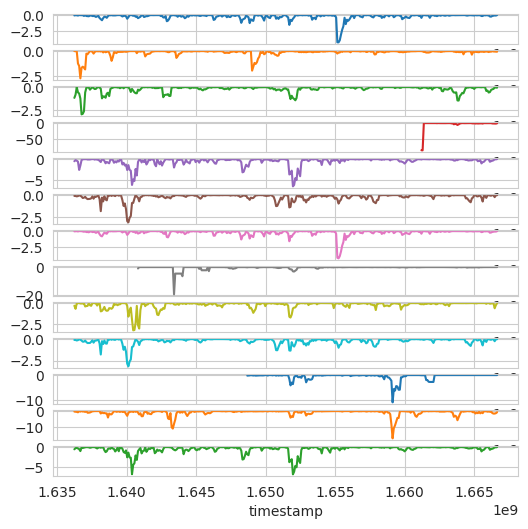

In [7]:
pd.pivot_table(df, index='timestamp', columns='pool_address', values='il').plot(subplots=True, legend=False)
print('IL percent over time')
plt.show()

The `il` column refers to the impermanent loss if invested in `pool_address` on `date` and fully exited on `date + 7 days`.


#### Payoff Matrix for correctly labeling a week as having high IL risk

|       | Positive | Negative |
| ----- | -------- | -------- |
| True  | 0        | \+1      |
| False | 0      | \-10     |

- If we correctly label a (pool, week) as having high IL risk (True Positive), we avoid a disaster but make no revenue so the payoff is 0
- If we correctly label a (pool, week) as having low IL risk (True Negative), we make small revenue from trading fees + farming incentives so the payoff is +1
- If we incorrectly label a (pool, week) as having low IL risk (False Negative), there is is a disaster from IL loss and the payoff is -10
- If we incorrectly label a (pool, week) as having high IL risk (False Positive), then we miss out on a week of revenue and the payoff is 0
 
This means that the most important part of a modeling of weekly IL risk is avoiding the high risk weeks (False Negatives)


In [8]:
df['il_more_than_1'] = df['il'] < -1
df['il_more_than_1'].value_counts(normalize=True) * 100

False    91.90836
True      8.09164
Name: il_more_than_1, dtype: float64

In [9]:
df[df['il_more_than_1']]['pool_address'].value_counts()

0xe55c3e83852429334A986B265d03b879a3d188Ac    84
0x61eB53ee427aB4E007d78A9134AaCb3101A2DC23    47
0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81    42
0xdC08159A6C82611aEB347BA897d82AC1b80D9419    29
0xAd5B1a6ABc1C9598C044cea295488433a3499eFc    25
0x53162D78dCa413d9e28cf62799D17a9E278B60E8    18
0x54138c3d494ec7edE33ed08EE6e0f7BC6149e2fC    16
0xC3f279090a47e80990Fe3a9c30d24Cb117EF91a8    15
0x470e8de2eBaef52014A47Cb5E6aF86884947F08c    12
0xCE84867c3c02B05dc570d0135103d3fB9CC19433    12
0xA1d7b2d891e3A1f9ef4bBC5be20630C2FEB1c470    11
0x795065dCc9f64b5614C407a6EFDC400DA6221FB0    11
0x43AE24960e5534731Fc831386c07755A2dc33D47    10
Name: pool_address, dtype: int64

If you start with the prior that past IL risk predicts future IL risk then you can look at the last year and conclude that

- `0xe55c3e83852429334A986B265d03b879a3d188Ac`: WETH-TCR 
- `0x61eB53ee427aB4E007d78A9134AaCb3101A2DC23`: WETH-FXS
- `0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81`: WETH-FXS

Are higher risk than

- `0x795065dCc9f64b5614C407a6EFDC400DA6221FB0`: WETH-SUSHI
- `0x43AE24960e5534731Fc831386c07755A2dc33D47`: WETH-SNX
- `0xA1d7b2d891e3A1f9ef4bBC5be20630C2FEB1c470`: WETH-SNX

In [10]:
def q90(x): # 90th Percentile
    return x.quantile(0.9)

def q10(x): # 10th Percentile
    return x.quantile(0.1)

descriptive_stats_il_by_pool = il_df.groupby(['pool_address'])['il'].agg(
    ['mean', 'std', 'median', 'min', 'max','count', q10, q90]).round(2)
descriptive_stats_il_by_pool.sort_values('std')

,mean,std,median,min,max,count,q10,q90
pool_address,,,,,,,,
0x470e8de2eBaef52014A47Cb5E6aF86884947F08c,-0.13,0.31,-0.05,-2.73,-0.0,353,-0.25,-0.00
0x53162D78dCa413d9e28cf62799D17a9E278B60E8,-0.22,0.39,-0.07,-3.03,-0.0,353,-0.62,-0.00
0x795065dCc9f64b5614C407a6EFDC400DA6221FB0,-0.22,0.39,-0.08,-3.10,-0.0,353,-0.55,-0.00
0xCE84867c3c02B05dc570d0135103d3fB9CC19433,-0.22,0.39,-0.08,-3.17,-0.0,353,-0.56,-0.00
0xC3f279090a47e80990Fe3a9c30d24Cb117EF91a8,-0.23,0.45,-0.06,-3.29,-0.0,353,-0.63,-0.00
0x43AE24960e5534731Fc831386c07755A2dc33D47,-0.23,0.50,-0.08,-4.38,-0.0,353,-0.52,-0.00
0xA1d7b2d891e3A1f9ef4bBC5be20630C2FEB1c470,-0.23,0.50,-0.08,-4.38,-0.0,353,-0.53,-0.00
0xecBa967D84fCF0405F6b32Bc45F4d36BfDBB2E81,-0.51,0.94,-0.18,-6.68,-0.0,353,-1.15,-0.00
0x61eB53ee427aB4E007d78A9134AaCb3101A2DC23,-0.53,0.99,-0.16,-6.60,-0.0,353,-1.30,-0.01


### Plotting Price Corr
- `0x54138c3d494ec7edE33ed08EE6e0f7BC6149e2fC` MYC:WETH has much higher IL losses so I think that would be the most risky pool
- `0x470e8de2eBaef52014A47Cb5E6aF86884947F08c` FOX:WETH looks like it is a much less IL risky pool with lower median IL and std dev IL. 

In [11]:
from constants import WETH
import web3

def build_risk_df():
    records = []
    for token in token_df['address'].unique():
        if token != WETH:
            token_symbol = token_df[token_df['address'] == token]['symbol'].values[0]
            two_price_df = price_df[price_df['token_address'].isin([token, WETH])].pivot(
                values='price', columns='token_address', index='block_number').dropna()
                
            pct_change_df = two_price_df.pct_change()

            diff = pct_change_df[WETH] - pct_change_df[token]

            mean_abs_diff = (diff.abs()).mean()
            mean_square_diff = (diff ** 2).mean()

            records.append({'token_symbol':token_symbol,
                            'corr': two_price_df.corr().values[0][1],
                            'mean_abs_diff': mean_abs_diff, 
                            'mean_square diff': mean_square_diff})
    
    return pd.DataFrame.from_records(records)

risk_df =  build_risk_df()
risk_df

,token_symbol,corr,mean_abs_diff,mean_square diff
0,GAMMA,0.898549,0.029421,0.009799
1,SUSHI,0.907737,0.032562,0.002061
2,MYC,0.229236,0.073650,0.021255
3,APW,0.896909,0.026057,0.001859
4,FOX,0.945561,0.023353,0.001881
5,SNX,0.919379,0.037278,0.003208
6,FXS,0.749349,0.052113,0.005779
7,TCR,0.821312,0.055485,0.007902
8,ALCX,0.883923,0.033995,0.002731


Even though two tokens can have the same price corr accross their life cycles we care about the daily (weekly?) difference in percent changes in price. 

By this we can see that MYC is a lot risky than FOX. 

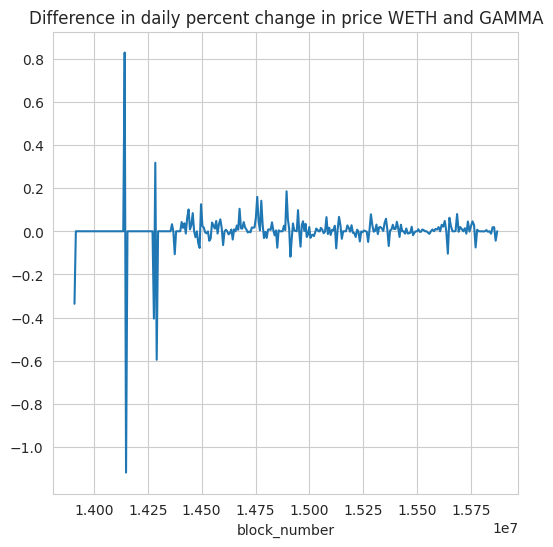

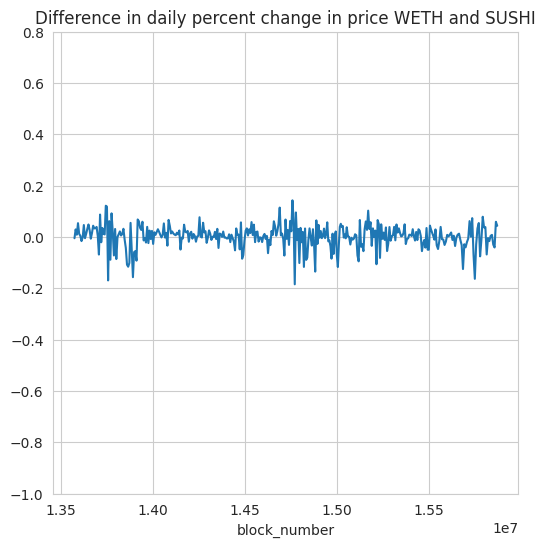

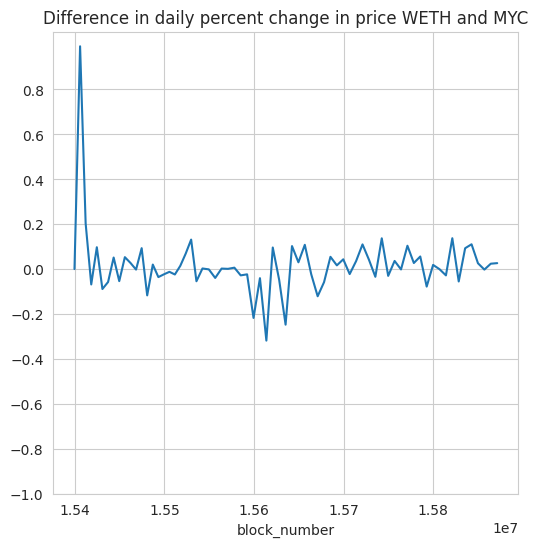

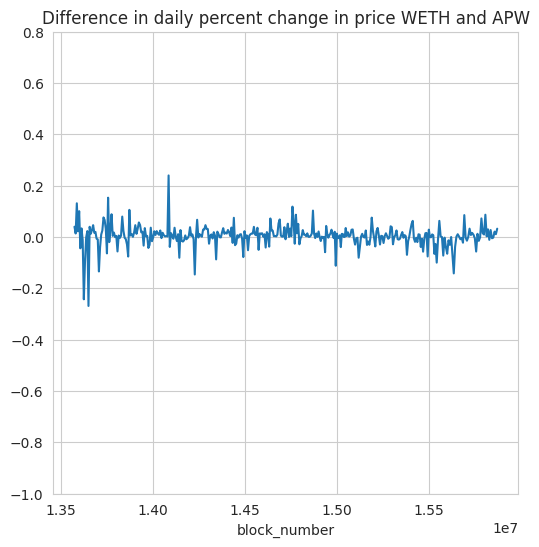

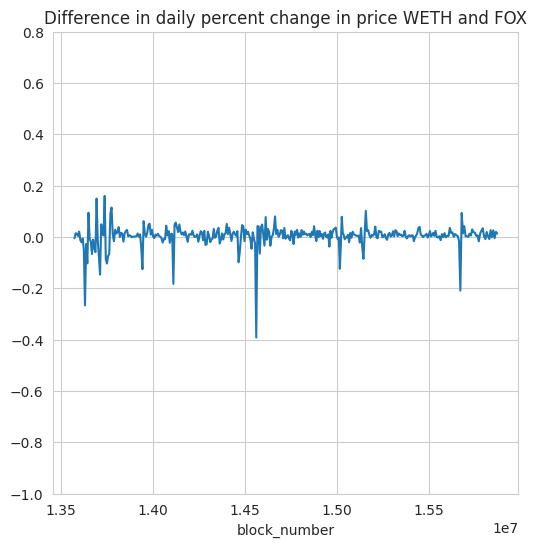

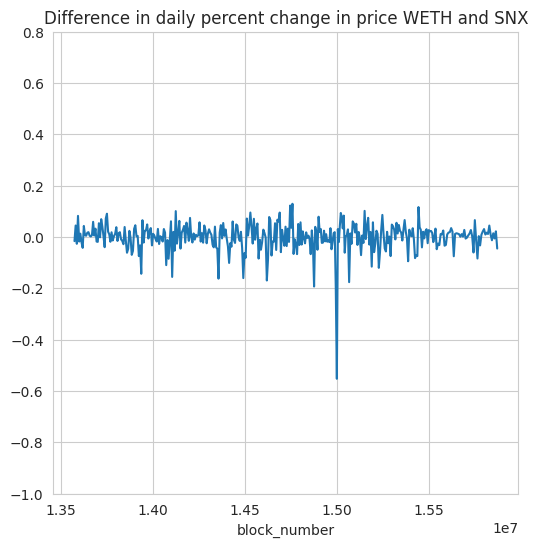

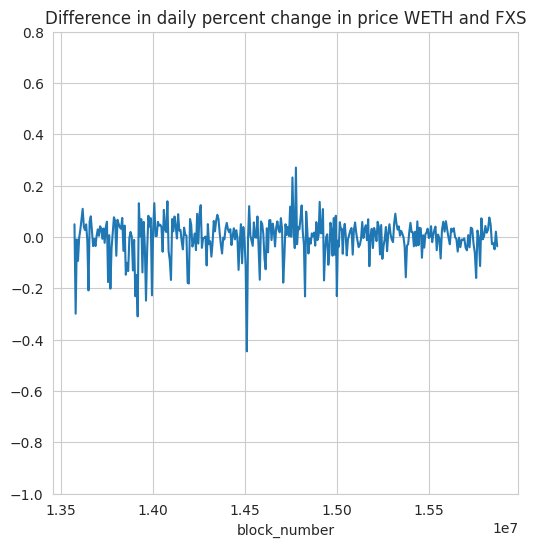

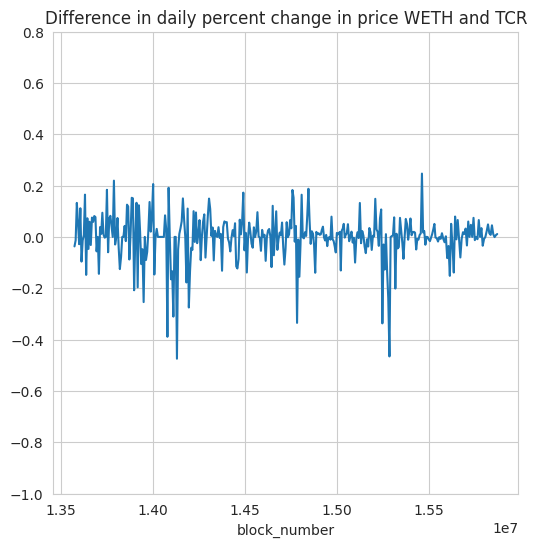

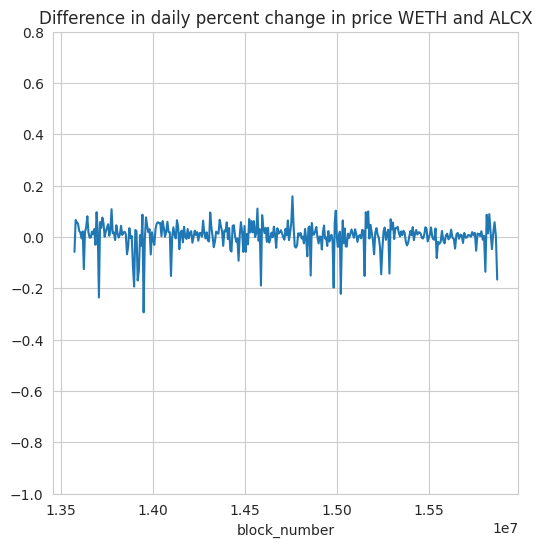

In [12]:
import numpy as np
def plot_daily_price_changes():
    for token in token_df['address'].unique():
        if token != WETH:
            token_symbol = token_df[token_df['address'] == token]['symbol'].values[0]
            two_price_df = price_df[price_df['token_address'].isin([token, WETH])].pivot(
                values='price', columns='token_address', index='block_number').dropna()
                
            pct_change_df = two_price_df.pct_change()
            pct_change_df['diff'] = pct_change_df[WETH] - pct_change_df[token]
            pct_change_df['diff'].plot()
            plt.title(f"Difference in daily percent change in price WETH and {token_symbol}")
            plt.yticks(np.arange(-1, 1, step=0.2))
            plt.show()
plot_daily_price_changes()

### How well does past price corr predict future price corr?

I'm looking at sliding 30 day windows of days price corr on days (0, 30) vs price corr on days (30, 60). 

With this we can try to see if high corr in the previous window is associated with high corr on the next window.



In [13]:
def build_sliding_window(lagsize: int=30 ) -> pd.DataFrame:
    results = []
    for t in token_df['address'].unique():
        if t != WETH:
            # previous 30 days predicts the next 30 days
            prices = flat_price_df[['block_number', t, WETH]].dropna()
            windows = [(i, i + lagsize, i + 2*lagsize) for i in range(prices.shape[0] - 2*lagsize)]
            # create windows of (0, 30) and (30, 60) ... (1, 31) and (31,61)
            # Answers: What is therelationship between corr in the previous lagsize days to the next lagsize days
            for start, middle, end in windows:

                start_block = prices.iloc[start]['block_number']
                middle_block = prices.iloc[middle]['block_number']
                end_block = prices.iloc[end]['block_number']

                start_sample = prices.iloc[start:middle]
                inital_price_corr = start_sample[[t, WETH]].corr().values[0][1]

                next_sample = prices.iloc[middle:end]
                next_price_corr = next_sample[[t, WETH]].corr().values[0][1]
            
                results.append(
                    {
                        'token': t, 'lag_size': lagsize,
                        'start_block': start_block, 'middle_block': middle_block, 'end_block': end_block, 
                        'inital_price_corr': inital_price_corr, 'next_price_corr': next_price_corr,

                    }
                )

    window_df =  pd.DataFrame.from_records(results)
    window_df['corr_diff'] = window_df['inital_price_corr'] - window_df['next_price_corr']
    return window_df

lag_size = 30
window_df = build_sliding_window(lag_size)
window_df

,token,lag_size,start_block,middle_block,end_block,inital_price_corr,next_price_corr,corr_diff
0,0x6BeA7CFEF803D1e3d5f7C0103f7ded065644e197,30,13903355.0,14097298.0,14291333.0,0.936578,-0.319952,1.256530
1,0x6BeA7CFEF803D1e3d5f7C0103f7ded065644e197,30,13909786.0,14103763.0,14297754.0,1.000000,-0.288509,1.288509
2,0x6BeA7CFEF803D1e3d5f7C0103f7ded065644e197,30,13916164.0,14110297.0,14304257.0,1.000000,-0.216897,1.216897
3,0x6BeA7CFEF803D1e3d5f7C0103f7ded065644e197,30,13922667.0,14116762.0,14310661.0,1.000000,-0.124559,1.124559
4,0x6BeA7CFEF803D1e3d5f7C0103f7ded065644e197,30,13929171.0,14123257.0,14317108.0,1.000000,-0.048085,1.048085
...,...,...,...,...,...,...,...,...
2353,0xdBdb4d16EdA451D0503b854CF79D55697F90c8DF,30,15430828.0,15628113.0,15842846.0,0.871292,0.576042,0.295251
2354,0xdBdb4d16EdA451D0503b854CF79D55697F90c8DF,30,15437150.0,15635275.0,15850001.0,0.884750,0.642084,0.242666
2355,0xdBdb4d16EdA451D0503b854CF79D55697F90c8DF,30,15443366.0,15642437.0,15857155.0,0.907806,0.703925,0.203881
2356,0xdBdb4d16EdA451D0503b854CF79D55697F90c8DF,30,15449619.0,15649598.0,15864318.0,0.909059,0.730663,0.178396


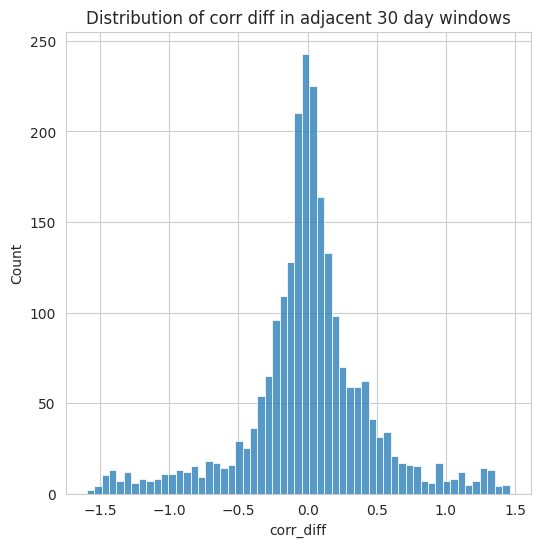

In [14]:
sns.histplot(window_df, x='corr_diff', legend=False)
plt.title(f'Distribution of corr diff in adjacent {lag_size} day windows')
plt.show()

The `corr_diff` is centered around 0 with fatter tails than would be expected with a normal distribution. 

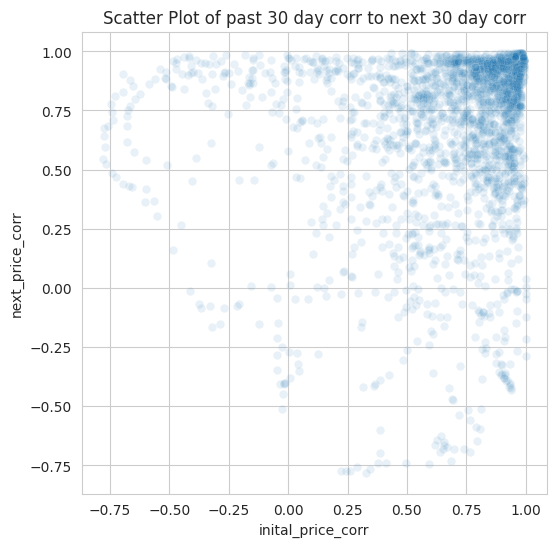

In [15]:
sns.scatterplot(data=window_df, x='inital_price_corr', y='next_price_corr', alpha=.1)
plt.title('Scatter Plot of past 30 day corr to next 30 day corr')
plt.show()

In general when there was a high corr in the previous 30 days there is likley a high corr in the next 30 days. This is true to greater and lesser degrees by pool

In [16]:
threshold = .8
window_df['inital_corr_above'] = window_df['inital_price_corr'] > threshold
window_df['next_corr_above'] = window_df['next_price_corr'] > threshold
window_df[['inital_corr_above', 'next_corr_above']].value_counts(normalize=True)

inital_corr_above  next_corr_above
True               True               0.298982
False              False              0.280746
                   True               0.210348
True               False              0.209924
dtype: float64

We can further break it up by pool

In [17]:
conditional_prob_by_token = window_df.groupby(['token', 'inital_corr_above'])[
    ['inital_corr_above', 'next_corr_above']].value_counts().reset_index()
conditional_prob_by_token.columns = ['token', 'inital_corr_above','next_corr_above', 'count']
conditional_prob_by_token['prob'] = window_df.groupby(['token', 'inital_corr_above'])[
    ['inital_corr_above', 'next_corr_above']].value_counts(normalize=True).reset_index()[0]
conditional_prob_by_token.sort_values('prob', ascending=False)

,token,inital_corr_above,next_corr_above,count,prob
8,0x4b13006980aCB09645131b91D259eaA111eaF5Ba,False,False,9,1.000000
9,0x4b13006980aCB09645131b91D259eaA111eaF5Ba,True,False,2,1.000000
2,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,True,False,73,0.784946
18,0x9C4A4204B79dd291D6b6571C5BE8BbcD0622F050,False,False,134,0.732240
6,0x4104b135DBC9609Fc1A9490E61369036497660c8,True,True,158,0.718182
16,0x6BeA7CFEF803D1e3d5f7C0103f7ded065644e197,True,True,105,0.695364
28,0xc770EEfAd204B5180dF6a14Ee197D99d808ee52d,True,True,134,0.690722
24,0xC011a73ee8576Fb46F5E1c5751cA3B9Fe0af2a6F,True,False,72,0.666667
32,0xdBdb4d16EdA451D0503b854CF79D55697F90c8DF,True,True,96,0.627451
0,0x3432B6A60D23Ca0dFCa7761B7ab56459D9C964D0,False,False,124,0.599034


We want tokens that have a high prob and count of `[True, True]` or `[False, True]`.

- Tokens that have high prob and count `[True, True]` can be thought of as "If it had high corr last month, it will probably have high corr this month"

- Tokens that have high prob and count `[False, True]` can be thought of as "If it had low corr last month, it will probably have high corr this month"



# Takeaways

- Modeling IL risk is difficult because it is usually in the 0-1 % range (92% of weeks in this dataset had less than 1% IL) with occasional outliers. In the worst case `0x54138c3d494ec7edE33ed08EE6e0f7BC6149e2fC` (WETH-MYC) had weekly IL of 87%!
- I think that looking at the historical IL and the daily percent change in the component token prices is a good starting point. I don’t feel confident in modeling (week, pool) risk with only these 13 pools
- Typically there are periods of near 0 IL and than short bursts of high IL across the board. This mean that simply diversifying into many different pools will not serve to hedge IL because the IL risks are correlated. 
- There are other simple heuritiscs like avoiding pools that have small TVL because there is not enough information about them to reach a conconclusion. 
- I think that the most risky pool is the MYC-WETH, GAMMA-WETH TCR-WETH pool because they have high std dev weekly IL, mean_square dif and worst case scenarios. 
- I think the least risky pools are FOX-WETH, ALCX-WETH, and APW-WETH because they have low std dev of, mean_square dif and worst case scenarios. 

## Further research

- Prices are gathered at 12PM GMT for up to the last year. We can make this more robust to reapeat the analysis with different times to make sure that this ranking is not due to noise. 
- To measure IL risk for pools with a stable coin we can look at indirect measures of volatility such as the costs to borrow or hedge the asset. 